In [3]:
!pip install matplotlib
!clear

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt   
import random  

# 情報計算科学の基礎 

レポート6(補完)



## 問題

$ x_i = 0.1i, y_i = (x_i)^3 + \beta rand() (i=1,2,3,......,10) $ で生成したデータセットに対するデータ補完式を $ y(x) = \Sigma_i=1^ 10 c_i x^i-1 $ で定める方法を考える。

ここで、rand は-1 から 1 までの値を取る乱数である。以
下の設問 1～3 においては各設問を通して β = 0.1 で作成した、式(3)～(12) で示す値 $ y_i(i = 1, 2, 3, ..., 10) $  を用いよ。

\begin{aligned}

y1 = 0.0831894 (3) \\
y2 = 0.100367 (4) \\
y3 = 0.107784 (5) \\
y4 = 0.0198079 (6) \\
y5 = 0.219709 (7) \\ 
y6 = 0.280256 (8) \\
y7 = 0.254182 (9) \\
y8 = 0.471638 (10) \\
y9 = 0.771075 (11) \\
y10 = 0.976337 (12) \\

\end{aligned}



In [4]:


N_SIZE = 10

y1 = 0.0831894
y2 = 0.100367  
y3 = 0.107784 
y4 = 0.0198079 
y5 = 0.219709 
y6 = 0.280256 
y7 = 0.254182 
y8 = 0.471638
y9 = 0.771075 
y10 = 0.976337

X = [(i+1)/10 for i in range(N_SIZE) ]
Y = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10]



## (1)

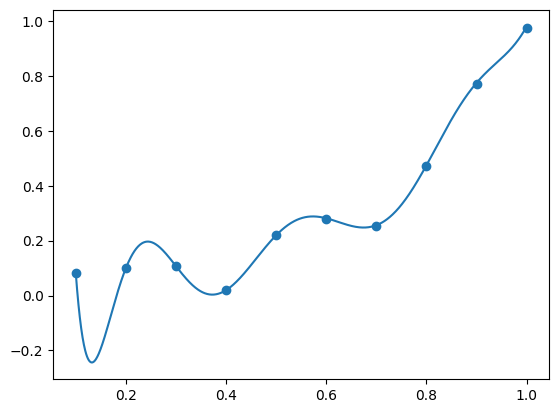

In [5]:
A = np.zeros((N_SIZE,N_SIZE))
def Init():
    for i in range(N_SIZE):
        for j in range(N_SIZE):
            A[i][j] = X[i]**j
    # print(A)

def inv_mat(A):
    n_size_of_A = len(A)
    X = np.eye(n_size_of_A)
    #まずAを上三角行列にする。
    A = A.astype('float64')
    for p in range(n_size_of_A):
        pivot = A[p][p]
        for j in range(p+1, n_size_of_A):
            coef = A[j][p] / pivot
            A[j] -= A[p] * coef
            X[j] -= X[p] * coef
    #途中経過確認。
    #print(A)
    #print(X)
    #対角成分を1にする。
    for i in range(n_size_of_A):
        X[i] /= A[i][i]
        A[i] /= A[i][i]
    #途中経過確認。
    #print(A)
    #print(X)
    #答えを出す。
    for i in range(n_size_of_A-1,0,-1):
        for j in range(i):
            X[j] -= X[i] * A[j][i]
            A[j][i] = 0
    return X

def trans_mat(A):
    size_of_A = ( len(A[0]), len(A) )
    # print(size_of_A)
    # print(A[0])
    X = np.zeros(size_of_A)

    for i in range(size_of_A[0]):
        for j in range(size_of_A[1]):
            X[i][j] = A[j][i]

    return X    

Init()

c = ( inv_mat(
            trans_mat(A) @ A
        ) 
        @ trans_mat(A) 
        ) @ np.array(Y)

# print('c:\n\n',c)

def y_func(x):
    '''答えとなる関数を生成（この関数はfloat to float の関数）'''
    y = 0
    for i in range(N_SIZE):
        y += c[i] * (x**i)
    
    return y

# for i in range(N_SIZE):
    # print(f'y_func@{i/10}')
    # print(y_func(i/10))

x = np.linspace(0.1,1,1000)
y=np.zeros(1000)
for i in range(1000):
    y[i] = y_func(x[i])

plt.figure()

plt.plot(x,y)
plt.scatter(X,Y)

plt.show()

# print(f'x:{x}')
# print(f'y:{y}')


上のグラフは観測値にフィットしすぎているため、改良が必要である。

## (2) 


### Lambda = 0.0001

In [6]:
EPSILON = 1e-5 # 0.000001

L=[0.0001,0.01,1.0]
ALPHA = 0.001
err = 1

def softthreshold(vector,la):
    x = []
    for v in vector:
        if v > la:
            x.append(v - la)
        elif v < -la:
            x.append(v + la)
        else:
            x.append(0)
    return np.array(x)


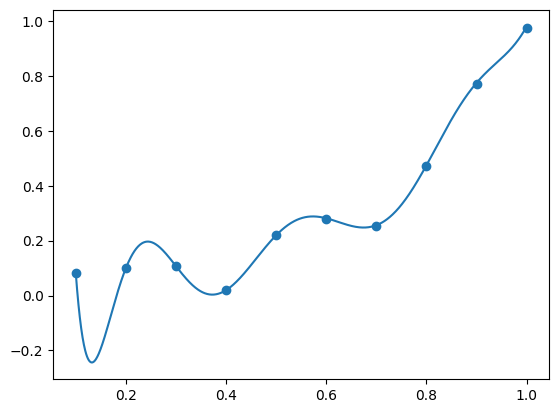

In [7]:
def y_func(x):
    '''答えとなる関数を生成（この関数はfloat to float の関数）'''
    y = 0
    for i in range(N_SIZE):
        y += c[i] * (x**i)
    
    return y

# for i in range(N_SIZE):
    # print(f'y_func@{i/10}')
    # print(y_func(i/10))

x = np.linspace(0.1,1,1000)
y=np.zeros(1000)
for i in range(1000):
    y[i] = y_func(x[i])

plt.figure()

plt.plot(x,y)
plt.scatter(X,Y)

plt.show()


### Lambda = 0.01

i:0
9.637162275201256e-06
i:34869
c :[0.06987938 0.         0.178911   0.23736908 0.2193225  0.16695558
 0.09965341 0.02582213 0.         0.        ]


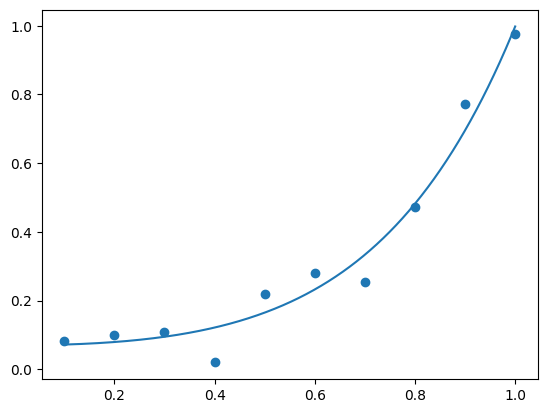

In [9]:
l = 1

i = 0
c = np.ones(N_SIZE)
err = 1
print(f'i:{i}')
while err > EPSILON:
    g = trans_mat(A) @ (A @ c - np.array(Y))
    # print('g')
    # print(g)
    c_t = c - ALPHA * g
    c_formar = c
    c = softthreshold(c_t,ALPHA*L[l])
    err = np.linalg.norm(c -c_formar) / np.linalg.norm(c_formar)
    # if i > 15000:
    #     print(f'i:{i}')
    #     print(err)
    # if i % 400 == 0:
    #     print(c) 
        
    i += 1

print(err) 
print(f'i:{i}')

print(f'c :{c}')
def y_func(x):
    '''答えとなる関数を生成（この関数はfloat to float の関数）'''
    y = 0
    for i in range(N_SIZE):
        y += c[i] * (x**i)
    
    return y

# for i in range(N_SIZE):
    # print(f'y_func@{i/10}')
    # print(y_func(i/10))

x = np.linspace(0.1,1,1000)
y=np.zeros(1000)
for i in range(1000):
    y[i] = y_func(x[i])

plt.figure()

plt.plot(x,y)
plt.scatter(X,Y)

plt.show()


### Lambda = 1.0

i:0
9.999176148076665e-06
i:15078
c :[0.02095898 0.3775759  0.         0.         0.         0.
 0.         0.         0.         0.        ]


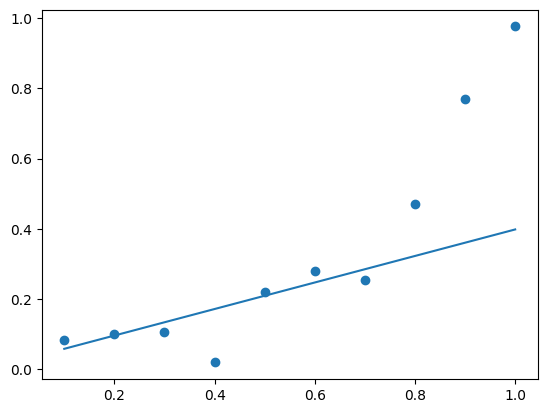

In [8]:
l = 2

i = 0
c = np.ones(N_SIZE)
err = 1
print(f'i:{i}')
while err > EPSILON:
    g = trans_mat(A) @ (A @ c - np.array(Y))
    # print('g')
    # print(g)
    c_t = c - ALPHA * g
    c_formar = c
    c = softthreshold(c_t,ALPHA*L[l])
    err = np.linalg.norm(c -c_formar) / np.linalg.norm(c_formar)
    # if i > 15000:
    #     print(f'i:{i}')
    #     print(err)
    # if i % 400 == 0:
    #     print(c) 
        
    i += 1

print(err) 
print(f'i:{i}')

print(f'c :{c}')
def y_func(x):
    '''答えとなる関数を生成（この関数はfloat to float の関数）'''
    y = 0
    for i in range(N_SIZE):
        y += c[i] * (x**i)
    
    return y

# for i in range(N_SIZE):
    # print(f'y_func@{i/10}')
    # print(y_func(i/10))

x = np.linspace(0.1,1,1000)
y=np.zeros(1000)
for i in range(1000):
    y[i] = y_func(x[i])

plt.figure()

plt.plot(x,y)
plt.scatter(X,Y)

plt.show()


## (3)

In [19]:
# Y = [[]]*N_SIZE
X_FILTERED = list()
Y_FILTERED = list()
A_FILTERED = list()
for i in range(N_SIZE):
    X_FILTERED.append( [element for element in X if not X.index(element) == i]  )
    Y_FILTERED.append( [element for element in Y if not Y.index(element) == i]  )
    A_FILTERED.append( np.delete(A,i,0))
    

L = [ pow(0.01,2-i) for i in range(3) ]

# print(A_FILTERED[1])


In [14]:

def LASSO_normalize(A_in,Y_in,Lam):
    size_of_input = len(Y_in)
    c = np.ones(N_SIZE)
    err = 1
    i = 0
    # print(f'i:{i}')
    while err > EPSILON:
        
        # print(A_in @ c)
        g = trans_mat(A_in) @ (A_in @ c - np.array(Y_in))
        # print('g')
        # print(g)
        c_t = c - ALPHA * g
        c_formar = c
        c = softthreshold(c_t,ALPHA*Lam)
        err = np.linalg.norm(c -c_formar) / np.linalg.norm(c_formar)
        # if i > 15000:
        #     print(f'i:{i}')
        #     print(err)
        # if i % 400 == 0:
        #     print(c) 
            
        i += 1

    # print(err) 
    # print(f'i:{i}')

    # print(f'c :{c}')
    def y_func(x):
        '''答えとなる関数を生成（この関数はfloat to float の関数）'''
        y = 0
        for i in range(N_SIZE):
            y += c[i] * (x**i)
        
        return y
    return y_func

def graph(func):
    x = np.linspace(0.1,1,1000)
    y=np.zeros(1000)
    for i in range(1000):
        y[i] = func(x[i])

    plt.figure()

    plt.plot(x,y)
    plt.scatter(X,Y)

    plt.show()

In [22]:
errlist = list()

for Lam in L:
    y_tests = list()
    y_errs = list()
    for i in range(N_SIZE):
        y_tests.append( LASSO_normalize(A_FILTERED[i],Y_FILTERED[i],Lam) )
        y_err = abs( y_tests[i](X[i]) - Y[i] )
        # print(f'y_err[{i}]={y_err}')
        y_errs.append(y_err)
    

    # print(y_errs)
    print(f'the mean of errs when lambda = {Lam}\n\t:{sum(y_errs) / len(y_errs)}')
    errlist.append(y_errs)
        



the mean of errs when lambda = 0.0001
	:0.1017688657197553
the mean of errs when lambda = 0.01
	:0.08560773539020224
the mean of errs when lambda = 1.0
	:0.18879819298704198


上記の結果より、$ \lambda = 0.01 $ の時が誤差が少ないとわかった。

### 他の人のをチェック

In [23]:
xlist, ylist = X, Y
Transpose = trans_mat
n = N_SIZE

errlist_m = list()

def norm2(n,vec):
    return np.linalg.norm(vec)

def softthreshold_matsu(element,la):
    x = 0
    if element > la:
        x = (element - la)
    elif element < -la:
        x = (element + la)
    else:
        x = 0
    return x

    
def judgement(r):
  x_main = []
  y_main = []
  x_cross = []
  y_cross = []
  sum = 0
  # dif = 0
  difs = []
  for i in range(n):
    #9:1にわける
    x_main = np.delete(xlist,i) #9個のxのリスト
    y_main = np.delete(ylist,i)
    A_del = np.delete(A,i,0) #抽出したxi以外による10*9の行列
    transA_del = np.delete(Transpose(A),i,1) #抽出したxi以外による9*10の転置行列
    
    #LASSOで検証
    a = 0.001
    err = 10**(-4)
    c = np.ones(n)
    c_new =1/2 * np.ones(n)
    while norm2(n, (c_new - c)) > err:
      g = transA_del@A_del@c - transA_del@y_main
      for i in range(n):
        c[i] = c_new[i]
      ct = c - a*g
      for i in range(len(ct)):
        c_new[i] = softthreshold_matsu(float(ct[i]),a*r)
    #return c_new #cを収束させた
    
    def y_func(x):
      y = 0
      for j in range(n):
        y += c_new[j] * x**j
      return y #9個のデータでの関数
    dif = abs(ylist[i] - y_func(xlist[i])) #ycorrect-ypredict
    sum += dif
    difs.append(dif) #小寺追加
  return sum/10,difs

r_lam = 0.0001
while r_lam < 10:
  ave,difs = judgement(r_lam)
  errlist_m.append(difs)
  print(f'the mean of errs when lambda = {r_lam}\n\t:{ave}')
  r_lam *= 100
  
  

the mean of errs when lambda = 0.0001
	:0.14353355546852498
the mean of errs when lambda = 0.01
	:0.1331289242314459
the mean of errs when lambda = 1.0
	:0.6390139950722105


In [24]:
for i,errlist_i in enumerate(errlist):
    print(errlist_i)

for i,errlist_m_i in enumerate(errlist_m):
    print(errlist_m_i)


for i in range(N_SIZE):
    print(f'i={i}\n:')
    for  in 

[0.01596372954650778, 0.027859627531057182, 0.018508932770104167, 0.12571662487890786, 0.07985554465899974, 0.06942458109934688, 0.10793887843519595, 0.026237443446765707, 0.11858367159582683, 0.4275996232348409]
[0.022837954423690597, 0.02879102202732879, 0.01633796364306453, 0.12785917037526015, 0.06401135740865602, 0.057889168127706975, 0.10719474587167233, 0.014956028494983842, 0.12152877508582094, 0.2946711684438381]
[0.03717657569563424, 0.005156639701303187, 0.03205042564906001, 0.17429792947966877, 0.011102988548834652, 0.036513442143966235, 0.03559717119368694, 0.18012727233907094, 0.5447983207541323, 0.8311611643650626]
[0.09875366031133348, 0.09891646341041249, 0.0988797808049402, 0.09320622372850829, 0.10289030825482448, 0.10357076283758038, 0.09713941447771024, 0.0925720633313527, 0.051633308116224796, 0.5977735694123627]
[0.0907802450616999, 0.090953280226854, 0.09082729265120015, 0.08516114624330862, 0.09488503755088518, 0.09577770401179442, 0.08903998257780255, 0.084739